In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Data/customer_segmentation.csv')

In [3]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


# Exploratory Data Analysis (EDA)

In [4]:
data.shape

(2240, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data['Income'].fillna(data['Income'].mean(), inplace = True)

In [8]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
spending_col = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[spending_col].sum(axis=1)
data['Total_Spending'] = (data['Total_Spending'])

In [10]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,843


In [11]:
curr_year = 2024
data['Age'] = curr_year - data['Year_Birth']
data['Age_Group'] = curr_year - data['Year_Birth']
data = data[(data['Age_Group'] >= 18) & (data['Age_Group'] <= 100)]
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending,Age,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,1617,67,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,27,70,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,776,59,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,53,40,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,422,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,1341,57,57
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,444,78,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,1241,43,43
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,843,68,68


### Dropping Extra Columns 

In [12]:
data = data.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Recency','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                 'AcceptedCmp2', 'Z_CostContact',  'Z_Revenue'], axis=1)
data

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Response,Total_Spending,Age,Age_Group
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,0,1,1617,67,67
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,0,0,27,70,70
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,0,0,776,59,59
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,0,0,53,40,40
4,PhD,Married,58293.0,1,0,173,43,118,46,27,15,0,0,422,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,709,43,182,42,118,247,0,0,1341,57,57
2236,PhD,Together,64014.0,2,1,406,0,30,0,0,8,0,0,444,78,78
2237,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,24,0,0,1241,43,43
2238,Master,Together,69245.0,0,1,428,30,214,80,30,61,0,0,843,68,68


### Visualising Relationships Between Columns 

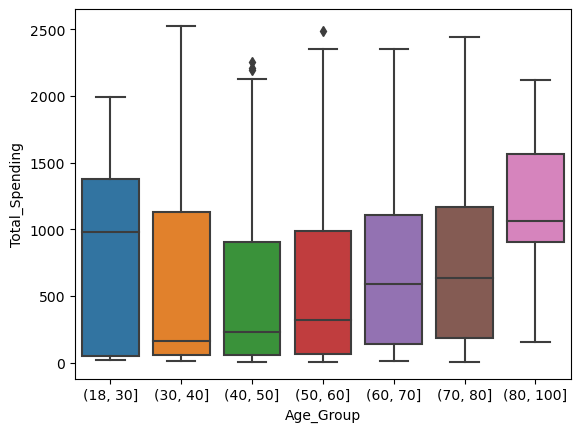

In [13]:
# Graph 1 - Total Spending by Age Group

age_bins = [18, 30, 40, 50, 60, 70, 80, 100]
data['Age_Group'] = pd.cut(data['Age_Group'], bins = age_bins)
sns.boxplot(x = 'Age_Group', y='Total_Spending', data=data)
plt.show()

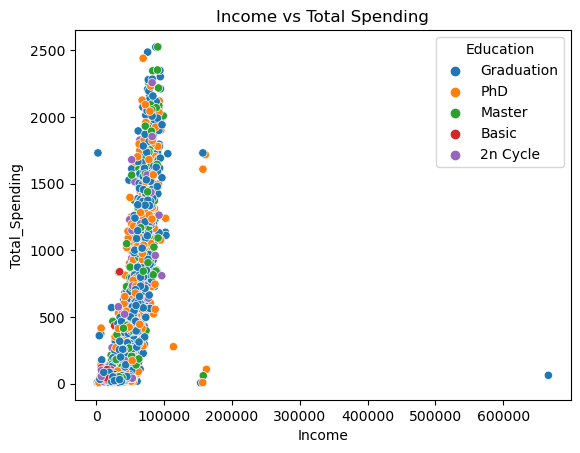

In [14]:
# Graph 2 - Total Spending by Income

sns.scatterplot(x = 'Income', y = 'Total_Spending', data=data, hue='Education')
plt.title('Income vs Total Spending')
plt.legend(title = 'Education')
plt.show()

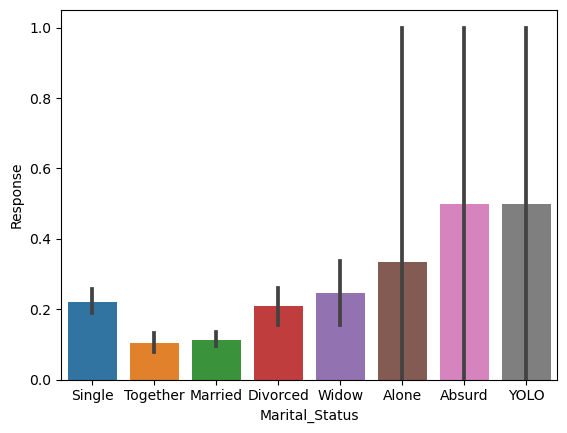

In [15]:
# Graph 3 - Response by Marital Status

sns.barplot(x = 'Marital_Status', y = 'Response', data=data)
plt.show()

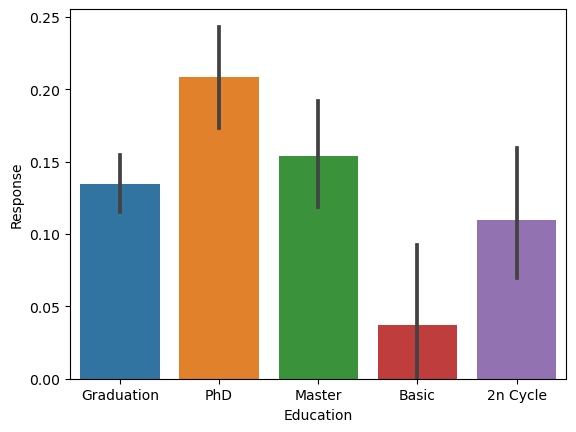

In [16]:
# Graph 4 - Response by Education

sns.barplot(x = 'Education', y = 'Response', data = data)
plt.show()

# Applying K-Means by using Sklearn

In [17]:
from sklearn.cluster import KMeans

# Number of clusters
k = 5

# Select the features for clustering
X = data[['Income', 'Total_Spending']]
X
# Create KMeans instance
kmeans = KMeans(n_clusters=k, random_state = 50)

# Fit the model to your data
kmeans.fit(X)

# Predict the clusters for the data
labels = kmeans.predict(X)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Add the cluster labels to the original DataFrame
data['Cluster'] = labels

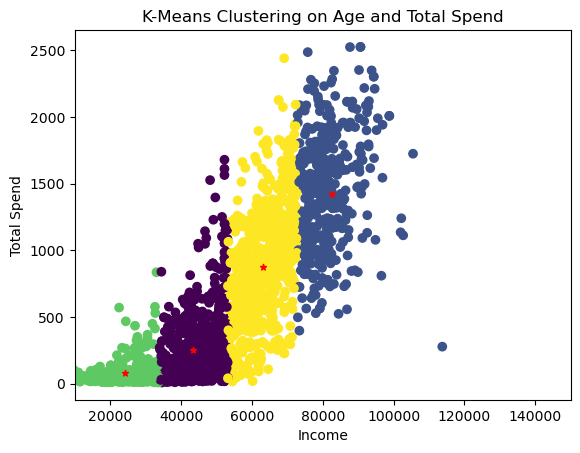

In [18]:
# Plot the data points and cluster centers
plt.scatter(data['Income'], data['Total_Spending'], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=20)
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.title('K-Means Clustering on Age and Total Spend')
plt.xlim(10000, 150000)
plt.show()

In [19]:
# Number of clusters
k = 5

# Select the features for clustering
X = data[['MntWines', 'MntMeatProducts']]

# Create KMeans instance
kmeans = KMeans(n_clusters=k, random_state = 50)

# Fit the model to your data
kmeans.fit(X)

# Predict the clusters for the data
labels = kmeans.predict(X)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Add the cluster labels to the original DataFrame
data['Cluster'] = labels

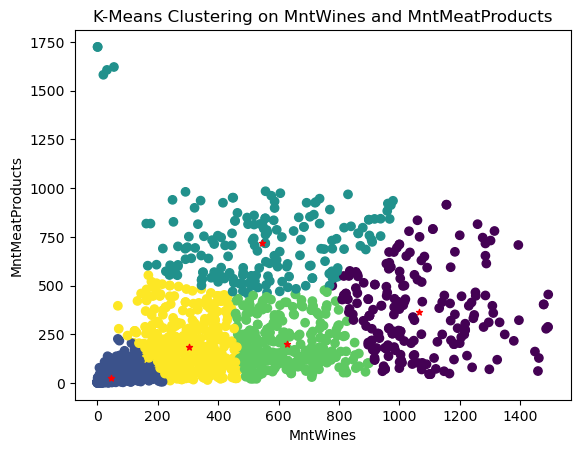

In [20]:
# Plot the data points and cluster centers
plt.scatter(data['MntWines'], data['MntMeatProducts'], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=20)
plt.xlabel('MntWines')
plt.ylabel('MntMeatProducts')
plt.title('K-Means Clustering on MntWines and MntMeatProducts')
plt.show()